In [25]:
#=============================
#           EDA              #
#=============================

In [26]:
#PASO 1 - RECOPILACION DE DATOS
#Carga de datos y muestreo

import pandas as pd

ds = pd.read_csv("../data/processed/vehicles_PTS.csv")

ds.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [28]:
#PASO 2 - EXPLORACION Y LIMPIEZA DE DATOS
#Estructura y tipo de datos

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [29]:
#Imprimo valores duplicados de algunas columnas de interes

print(ds['id'].duplicated().sum())
print(ds['image_url'].duplicated().sum())
print(ds['description'].duplicated().sum())
print(ds['lat'].duplicated().sum())
print(ds['long'].duplicated().sum())


0
184980
65968
373698
373107


In [30]:
#Verifico valores nulos de cada columna

nulos = ds.isnull().sum()
nulos

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [31]:
#Elimino columnas innecesarias

ds.drop(['id','url','region_url','condition','cylinders','title_status','VIN','drive','size','paint_color','image_url','description','county'],axis=1,inplace=True)


In [32]:
#Muestro estructura actualizada

ds.head()

,region,price,year,manufacturer,model,fuel,odometer,transmission,type,state,lat,long,posting_date
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [33]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   transmission  424324 non-null  object 
 8   type          334022 non-null  object 
 9   state         426880 non-null  object 
 10  lat           420331 non-null  float64
 11  long          420331 non-null  float64
 12  posting_date  426812 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 42.3+ MB


In [34]:
#PASO 3 - ANALISIS UNIVARIANTE
#Analisis Variables Categoricas

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

[]

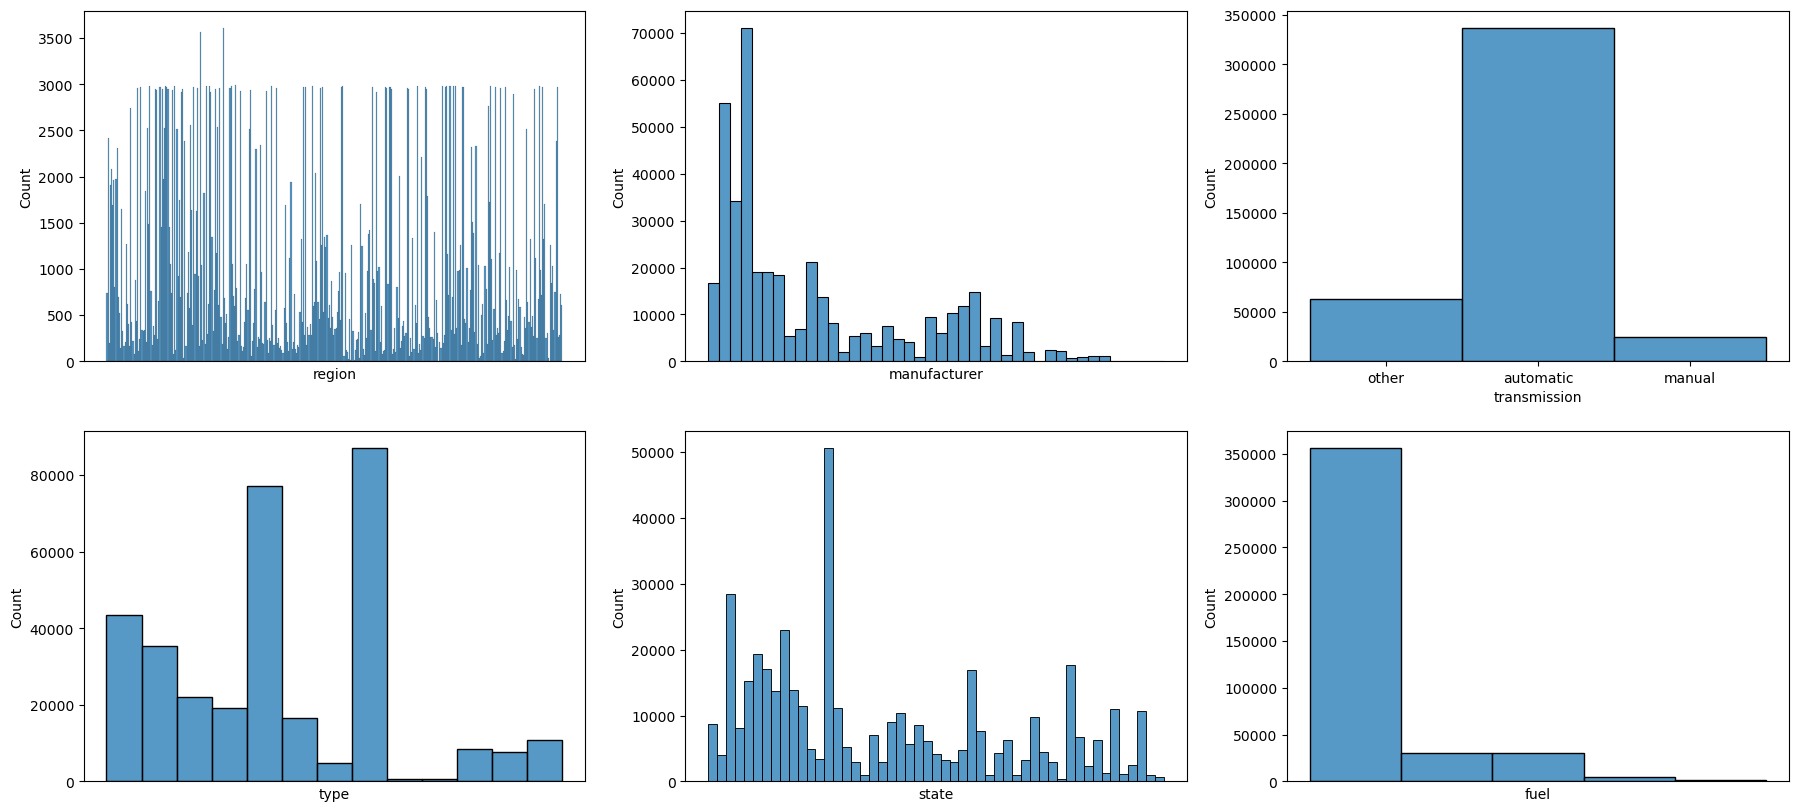

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axis = plt.subplots(2,3,figsize=(22,10))

sns.histplot(ax=axis[0,0],data=ds,x='region').set_xticks([])
sns.histplot(ax=axis[0,1],data=ds,x='manufacturer').set_xticks([])
#sns.histplot(ax=axis[1,0],data=ds,x='model')
sns.histplot(ax=axis[0,2],data=ds,x='transmission')
sns.histplot(ax=axis[1,0],data=ds,x='type').set_xticks([])
sns.histplot(ax=axis[1,1],data=ds,x='state').set_xticks([])
sns.histplot(ax=axis[1,2],data=ds,x='fuel').set_xticks([])



In [36]:
#Analisis Variables Numericas

#=====   REVISAR

fig,axis = plt.subplots(3,2,figsize=(10,14),gridspec_kw={"height_ratios":[6,1,6,1]})

sns.histplot(ax=axis[0,0],data=ds,x='price')
sns.boxplot(ax=axis[1,0],data=ds,x='price')

sns.histplot(ax=axis[0,1],data=ds,x='year')
sns.boxplot(ax=axis[1,1],data=ds,x='year')

sns.histplot(ax=axis[2,0],data=ds,x='odometer')
sns.boxplot(ax=axis[3,0],data=ds,x='odometer')

#plt.show()


ValueError: Expected the given number of height ratios to match the number of rows of the grid

<Figure size 1000x1400 with 0 Axes>

<Axes: >

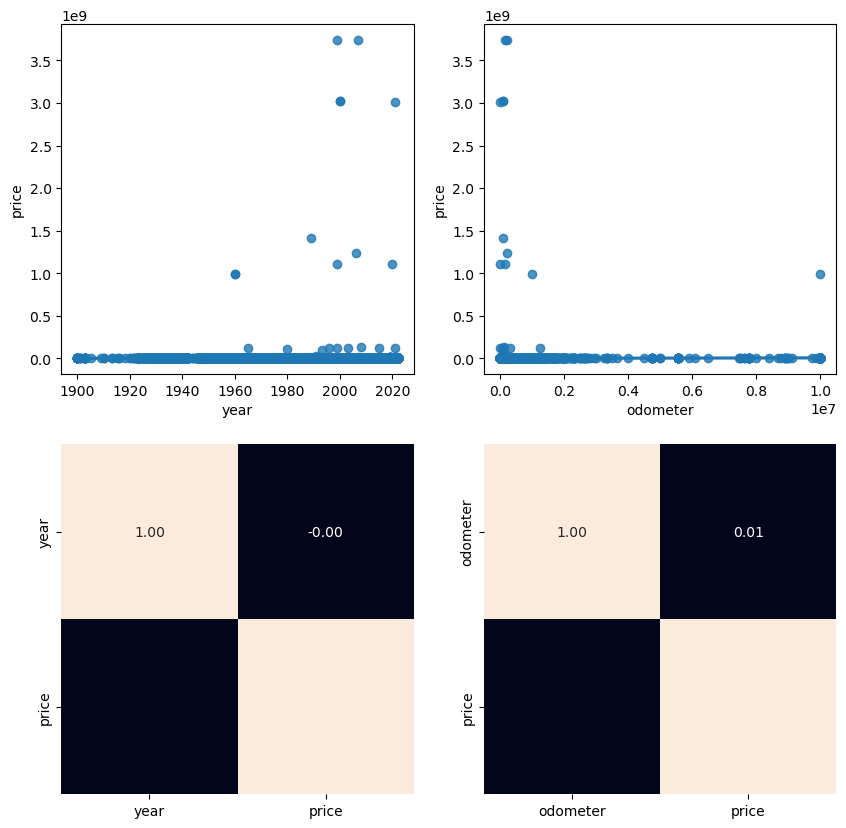

In [37]:
#PASO 4 - ANALISIS MULTIVARIANTE
#Analisis numerico-numerico

fig,axis = plt.subplots(2,2,figsize=(10,10))

sns.regplot(ax=axis[0,0],data=ds,x='year',y='price')
sns.heatmap(ds[['year','price']].corr(),fmt='.2f',ax=axis[1,0],cbar=False,annot=True)

sns.regplot(ax=axis[0,1],data=ds,x='odometer',y='price')
sns.heatmap(ds[['odometer','price']].corr(),fmt='.2f',ax=axis[1,1],cbar=False,annot=True)

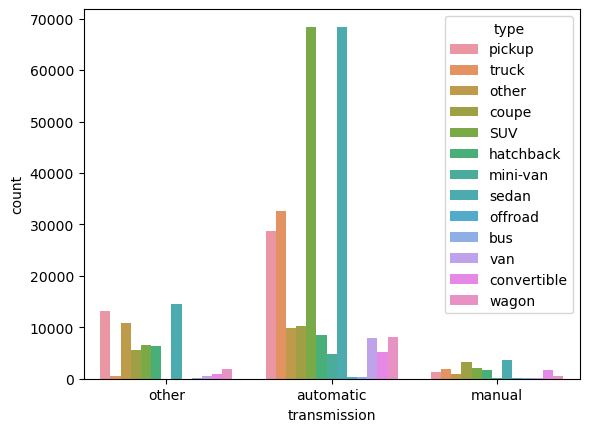

In [41]:
#Analisis categorico-categorico

sns.countplot(data=ds,x='transmission', hue='type')

plt.show()

In [61]:
#Factorizo region, state, manufacturer, model y fuel

ds["region_n"] = pd.factorize(ds["region"])[0]
ds["state_n"] = pd.factorize(ds["state"])[0]
ds["manufacturer_n"] = pd.factorize(ds["manufacturer"])[0]
ds["model_n"] = pd.factorize(ds["model"])[0]
ds["fuel_n"] = pd.factorize(ds["fuel"])[0]
ds["type_n"] = pd.factorize(ds["type"])[0]
ds["transmission_n"] = pd.factorize(ds["transmission"])[0]
ds["posting_date_n"] = pd.factorize(ds["posting_date"])[0]

In [62]:
ds.head()

,region,price,year,manufacturer,model,fuel,odometer,transmission,type,state,...,long,posting_date,region_n,state_n,manufacturer_n,model_n,fuel_n,type_n,transmission_n,posting_date_n
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,...,NaN,NaN,0,0,-1,-1,-1,-1,-1,-1
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,...,NaN,NaN,1,1,-1,-1,-1,-1,-1,-1
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,...,NaN,NaN,2,2,-1,-1,-1,-1,-1,-1
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,...,NaN,NaN,3,3,-1,-1,-1,-1,-1,-1
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,...,NaN,NaN,4,4,-1,-1,-1,-1,-1,-1


In [72]:
ds.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'transmission', 'type', 'state', 'lat', 'long', 'posting_date',
       'region_n', 'state_n', 'manufacturer_n', 'model_n', 'fuel_n', 'type_n',
       'transmission_n', 'posting_date_n'],
      dtype='object')

<Axes: >

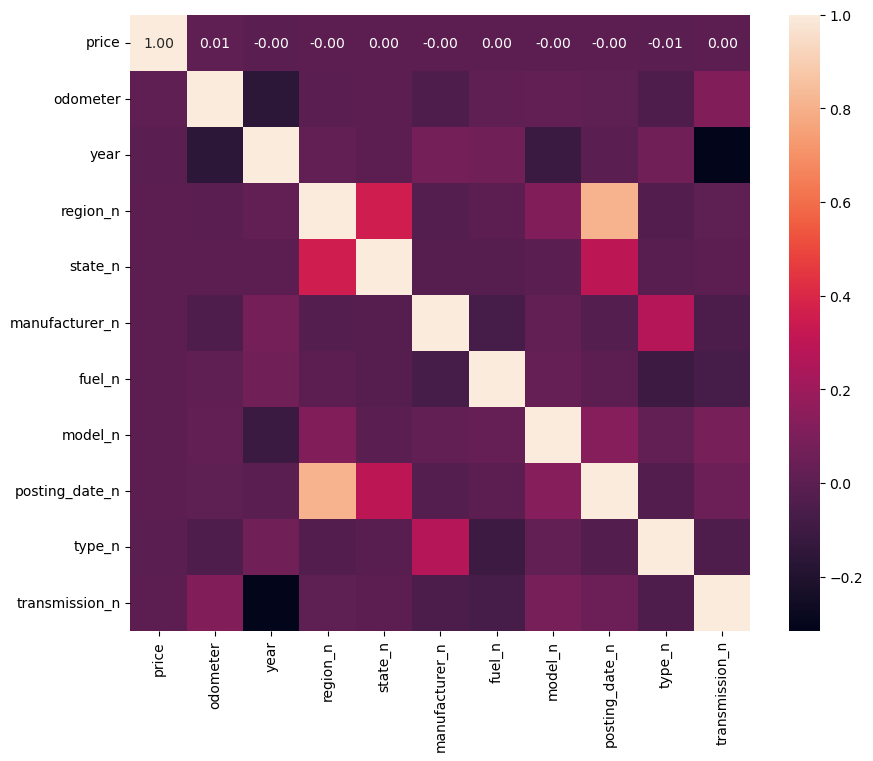

In [77]:
#Analisis de correlaciones

fig, axis = plt.subplots(figsize = (10,8))

sns.heatmap(ds[["price", "odometer", "year","region_n","state_n","manufacturer_n",
                "fuel_n","model_n","posting_date_n","type_n","transmission_n"]].corr(), annot=True, fmt=".2f")


In [78]:
sns.pairplot(data=ds)

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
